# 导入库

In [1]:
import os
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.stats import reciprocal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pickle

from Lib import *

devices = tf.config.list_physical_devices()
try:
    tf.config.set_visible_devices(devices[0])
except:
    print('set only CPU failed!')

print('logical_devices: ',tf.config.list_logical_devices())
print('visible_devices: ',tf.config.get_visible_devices())

logical_devices:  [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
visible_devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# 训练图

In [6]:
with open('trainHistoryDict.txt','rb') as file_pi:
    history=pickle.load(file_pi)

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

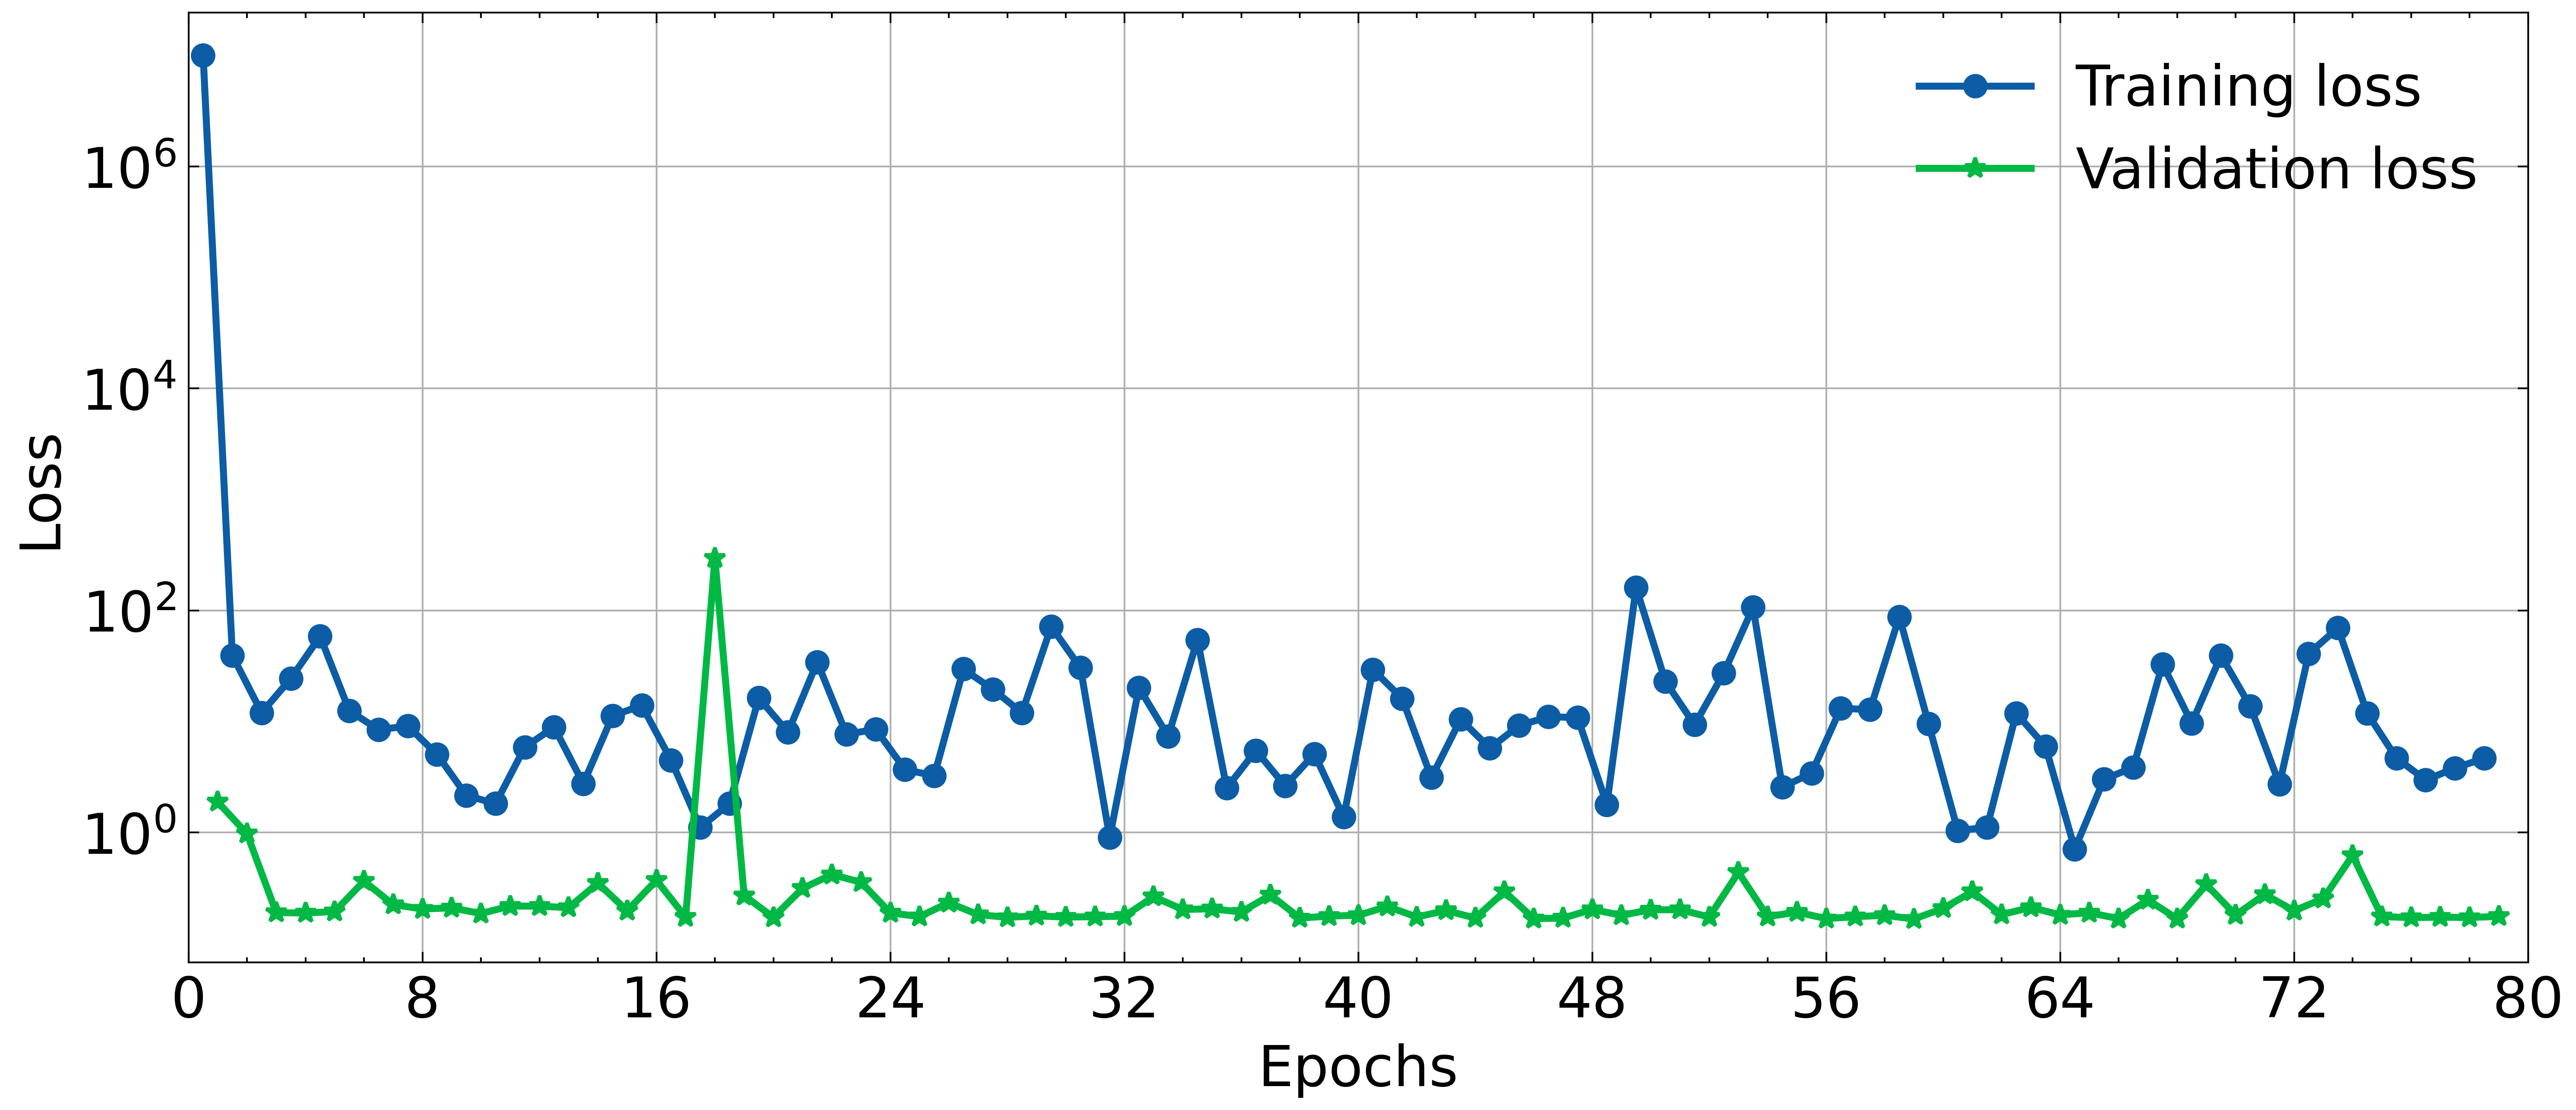

In [34]:
loss = history["loss"]
loss[0] = 10000000
val_loss = history["val_loss"]
plt.style.use('science')
with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(12, 5))
    plt.yscale('log')
    plt.plot(np.arange(len(loss)) + 0.5, loss,  marker = 'o',label="Training loss",linewidth=2)
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, marker = '*',label="Validation loss",linewidth=2)
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=16)
    plt.xlabel("Epochs",fontsize = 16)
    plt.ylabel("Loss",fontsize=16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlim((0, 80))
    #plot_learning_curves(history["loss"], history["val_loss"])
    plt.savefig('./train_epoch/train_epoch.jpg')
    plt.show()
    

# 统计图

In [3]:
low_speed_list = ['data_001.mat','data_004.mat','data_007.mat','data_010.mat']
middle_speed_list = ['data_002.mat','data_005.mat','data_008.mat','data_011.mat']
high_speed_list = ['data_003.mat','data_006.mat','data_009.mat','data_012.mat']
predictor_list = [LSTMPredictor('test_data_6'),LSTMPredictor('test_data_7'),LSTMPredictor('test_data_5')]
friction_1_list = ['data_001.mat','data_005.mat']
friction_2_list = ['data_002.mat','data_006.mat']
friction_3_list = ['data_003.mat','data_007.mat']
friction_4_list = ['data_004.mat','data_008.mat']
friction_lists = [friction_1_list,friction_2_list,friction_3_list,friction_4_list]
speed_lists = [low_speed_list,middle_speed_list,high_speed_list]

MSE: 0.002881804238743439
MSE: 0.002894185771244975
MSE: 0.0029077029429830687
MSE: 0.0029081454047107953
MSE: 0.005249058240335711
MSE: 0.0032704307708505674
MSE: 0.003664528184784879
MSE: 0.0037417514036879452
MSE: 0.06357571229295655
MSE: 0.015377365997910416
MSE: 0.02268808837382203
MSE: 0.02377774069378578


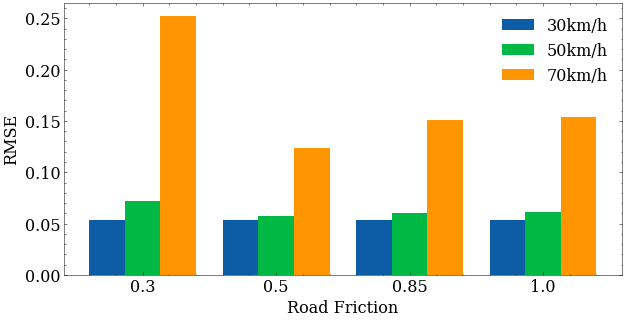

In [36]:
plt.style.use('science')
mse_list =[]
mse = []
with plt.style.context(['science','no-latex']):
    for predictor in predictor_list:

        mse.clear()
        for friction in friction_lists:
            Y_all = np.empty([0,1])
            Y_pred_all = np.empty([0,1])
            for file in friction:
                var = 0
                Y_,Y_pred = predictor.predict(file)
                Y_all = np.concatenate((Y_all,Y_[:,var][:,np.newaxis]))
                Y_pred_all = np.concatenate((Y_pred_all,Y_pred[:,var][:,np.newaxis])) 
            y = Y_all
            y_pred = Y_pred_all
            mse.append(np.sqrt(mean_squared_error(y,y_pred)))
            print('MSE:',mean_squared_error(y,y_pred))
        mse_list.append(np.array(mse))

    x = np.arange(4)   
    plt.figure(figsize=(10, 5))

    total_width, n = 0.8, 3
    width = total_width / n
    x = x - (total_width - width) / 2




    plt.bar(x, mse_list[0],  width=width, label='30km/h')
    plt.bar(x + width, mse_list[1], width=width, label='50km/h')
    plt.bar(x + 2 * width, mse_list[2], width=width, label='70km/h')

    names = ['0.3','0.5','0.85','1.0']
    plt.xticks(x+ width, names,fontsize = 16)
    plt.yticks(fontsize=16)

    plt.ylabel("RMSE",fontsize=16)
    plt.xlabel("Road Friction",fontsize=16)

    plt.legend(fontsize=16)
    plt.savefig('./image_stat/rmse',dpi=200,pad_inches = 0)

MSE: 0.0394726560918984
MSE: 0.03962954182600606
MSE: 0.03976445836257216
MSE: 0.03977228704116143
MSE: 0.04537229026852757
MSE: 0.036220883570538855
MSE: 0.03872792134513015
MSE: 0.03918158322736606
MSE: 0.17156878546272097
MSE: 0.09092964340233804
MSE: 0.1112156921618621
MSE: 0.11337332413895305


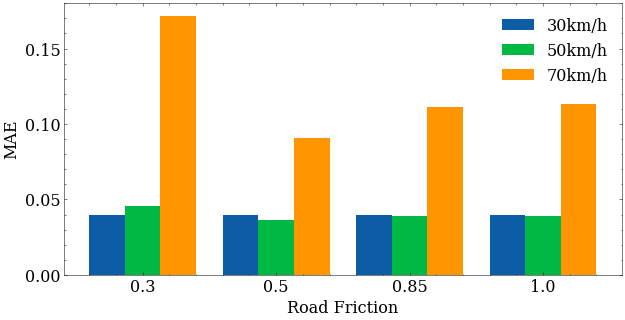

In [35]:
mae_list =[]
mae = []
plt.style.use('science')
with plt.style.context(['science','no-latex']):
    for predictor in predictor_list:

        mae.clear()
        for friction in friction_lists:
            Y_all = np.empty([0,1])
            Y_pred_all = np.empty([0,1])
            for file in friction:
                var = 0
                Y_,Y_pred = predictor.predict(file)
                Y_all = np.concatenate((Y_all,Y_[:,var][:,np.newaxis]))
                Y_pred_all = np.concatenate((Y_pred_all,Y_pred[:,var][:,np.newaxis])) 
            y = Y_all
            y_pred = Y_pred_all
            mae.append(np.mean(np.abs(y-y_pred)))
            print('MSE:',np.mean(np.abs(y-y_pred)))
        mae_list.append(np.array(mae))

    x = np.arange(4)   
    plt.figure(figsize=(10, 5))

    total_width, n = 0.8, 3
    width = total_width / n
    x = x - (total_width - width) / 2

    plt.bar(x, mae_list[0],  width=width, label='30km/h')
    plt.bar(x + width, mae_list[1], width=width, label='50km/h')
    plt.bar(x + 2 * width, mae_list[2], width=width, label='70km/h')
    #plt.xticks(['0.3','0.5','0.85','1.0'])
    names = ['0.3','0.5','0.85','1.0']
    plt.xticks(x+ width, names,fontsize = 16)
    plt.yticks([0.0,0.05,0.1,0.15],fontsize=16)

    plt.ylabel("MAE",fontsize=16)
    plt.xlabel("Road Friction",fontsize=16)

    plt.legend(fontsize=16)
    plt.savefig('./image_stat/mae',dpi=200,pad_inches = 0)

# 估计结果图

In [2]:
low_speed_list = ['data_001.mat','data_004.mat','data_007.mat','data_010.mat']
middle_speed_list = ['data_002.mat','data_005.mat','data_008.mat','data_011.mat']
high_speed_list = ['data_003.mat','data_006.mat','data_009.mat','data_012.mat']
friction_1_list = ['data_001.mat','data_005.mat']
friction_2_list = ['data_002.mat','data_006.mat']
friction_3_list = ['data_003.mat','data_007.mat']
friction_4_list = ['data_004.mat','data_008.mat']
friction_lists = [friction_1_list,friction_2_list,friction_3_list,friction_4_list]
speed_lists = [low_speed_list,middle_speed_list,high_speed_list]

MSE: 0.005249058240335711
RMSE: 0.07245038468038463
MAE: 0.04537229026852757
MSE: 0.0032704307708505674
RMSE: 0.05718768023666083
MAE: 0.036220883570538855
MSE: 0.003664528184784879
RMSE: 0.06053534657359185
MAE: 0.03872792134513015
MSE: 0.0037417514036879452
RMSE: 0.06116985698600206
MAE: 0.03918158322736606


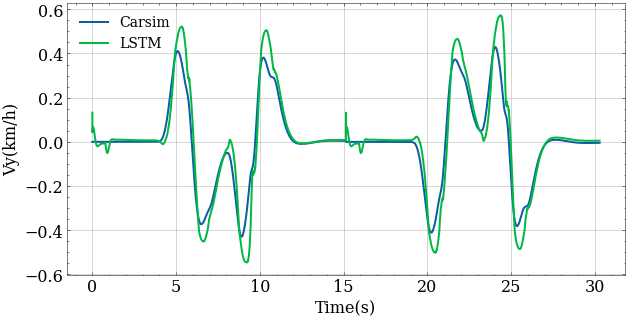

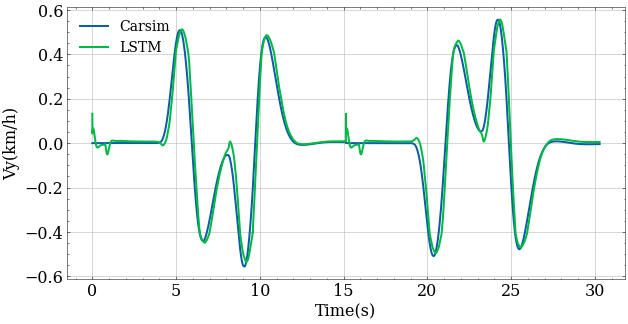

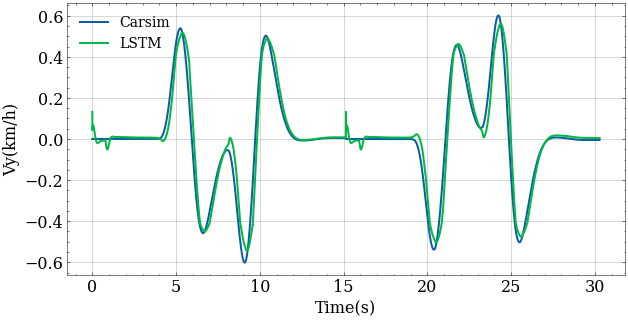

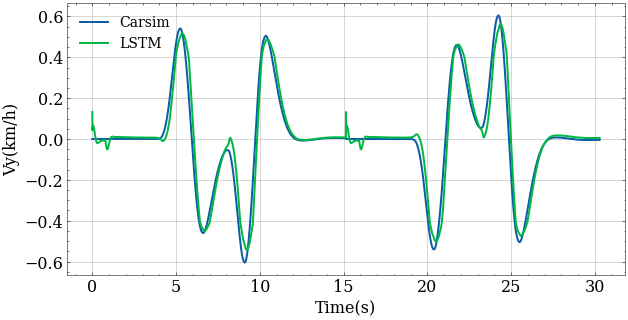

In [4]:
predictor = LSTMPredictor('test_data_5') # 5: 70km/h 6: 30km/h 7: 50km/h
i = 0
plt.style.use('science')
with plt.style.context(['science','no-latex']):
    for firction in friction_lists:   
        i += 1
        plt.figure(figsize=(10, 5))

        Y_all = np.empty([0,1])
        Y_pred_all = np.empty([0,1])
        for file in firction:
            var = 0
            Y_,Y_pred = predictor.predict(file)
            Y_all = np.concatenate((Y_all,Y_[:,var][:,np.newaxis]))
            Y_pred_all = np.concatenate((Y_pred_all,Y_pred[:,var][:,np.newaxis])) 
        y = Y_all
        y_pred = Y_pred_all 
        #print('std:',np.std(y-y_pred))
        print('MSE:',mean_squared_error(y,y_pred))
        print('RMSE:',np.sqrt(mean_squared_error(y,y_pred)))
        print('MAE:',np.mean(np.abs(y-y_pred)))
        #print('mean:',np.mean(np.abs(y-y_pred)/y.max()))
        #print('rel std:',np.std(np.abs(y-y_pred)/y.max()))
        time = np.arange(0,(Y_all.shape[0])/200,0.005)

        #plt.plot(time,y, 'k-.',label="Carsim",linewidth=2)
        #plt.plot(time,y_pred, 'r:',label="LSTM",linewidth=2)
        plt.plot(time,y,label="Carsim",linewidth=2)
        plt.plot(time,y_pred,label="LSTM",linewidth=2)
        plt.ylabel("Vy(km/h)",fontsize=16)
        plt.xlabel("Time(s)",fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        #plt.xlim((0, 22))
        #plt.ylim(())
        plt.grid(True)
        plt.legend(fontsize=14,loc='upper left')
        fig_name = 'fig_{num}_gear_speed'.format(num=i)
        plt.savefig('./image1031/new_30_'+fig_name,dpi=200,pad_inches = 0)

# 新增高速工况

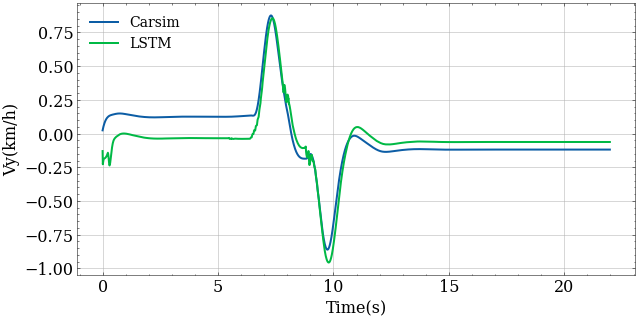

In [7]:
predictor = LSTMPredictor('test_data_8') # 5: 70km/h 6: 30km/h 7: 50km/h
i = 0
plt.style.use('science')
with plt.style.context(['science','no-latex']):
    Y_,Y_pred = predictor.predict('data_001.mat')
   
    plt.figure(figsize=(10, 5))
    time = np.arange(0,(Y_.shape[0])/200,0.005)

        #plt.plot(time,y, 'k-.',label="Carsim",linewidth=2)
        #plt.plot(time,y_pred, 'r:',label="LSTM",linewidth=2)
    plt.plot(time,Y_,label="Carsim",linewidth=2)
    plt.plot(time,Y_pred,label="LSTM",linewidth=2)
    plt.ylabel("Vy(km/h)",fontsize=16)
    plt.xlabel("Time(s)",fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        #plt.xlim((0, 22))
        #plt.ylim(())
    plt.grid(True)
    plt.legend(fontsize=14,loc='upper left')
    fig_name = 'fig_{num}_gear_speed'.format(num=i)
    plt.savefig('./image/image_20211211/new_30_'+fig_name,dpi=200,pad_inches = 0)